# Практическая работа №1: Регрессионный анализ
Выполнил студент гр. 1374 Сабанов Петр. Вариант №20

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

1) Линейная регрессия:
   $Y = X \cdot \beta + \epsilon$
   Где:
   - $Y$ - вектор наблюдений,
   - $X$ - матрица регрессоров,
   - $\beta$ - вектор параметров,
   - $\epsilon$ - вектор случайных ошибок.  

Для квадратичной регрессии модель выглядит следующим образом:

$Y = X \cdot \beta + \epsilon$

Где:
- $Y$ - вектор наблюдений (зависимая переменная),
- $X$ - матрица регрессоров, включая столбцы с различными степенями предиктора (например, столбец$X$,$X^2$для квадратичной регрессии),
- $\beta$ - вектор параметров, включая коэффициенты для каждого регрессора,
- $\epsilon$ - вектор случайных ошибок, предполагаемых нормально распределенными.

Модель квадратичной регрессии может быть представлена уравнением:

$Y = \beta_0 + \beta_1 \cdot X + \beta_2 \cdot X^2 + \epsilon$

Где:
- $\beta_0$ представляет сдвиг (intercept),
- $\beta_1$ - коэффициент, связанный с линейным регрессором$X$,
- $\beta_2$ - коэффициент, связанный с квадратичным регрессором$X^2$.

2) Метод наименьших квадратов (МНК) в линейной регрессии:
   $\hat{\beta} = (X^T X)^{-1} X^T Y$
   Минимизация суммы квадратов остатков:
   $S = \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2$

3) Оценка хи-квадрат:
   $\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$
   Где:
   - $O_i$ - наблюдаемая частота,
   - $E_i$ - ожидаемая частота.  

4) Доверительные интервалы и доверительный эллипсоид:
   Доверительный интервал для параметра $\beta_j$:
   $\hat{\beta_j} \pm t_{\alpha/2, n-p} \cdot SE(\hat{\beta_j})$
   
   Уравнение доверительного эллипсоида:
   $\left(\frac{\hat{\beta_1} - \beta_1}{SE(\hat{\beta_1})}\right)^2 + \left(\frac{\hat{\beta_2} - \beta_2}{SE(\hat{\beta_2})}\right)^2 = \chi^2_{\alpha,2}$

5) Несмещённая оценка дисперсии:
   $\hat{\sigma}^2 = \frac{1}{n-p} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2$
   Где:
   - $n$ - количество наблюдений,
   - $p$ - количество параметров.

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Данные

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

# Данные из таблицы
X = [3, 3, 3, 2, 2, 1, 1, 1, 0, 2, 3, 0, 1, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 0, 3, 3, 0, 0, 1, 0, 1, 2, 3, 0, 3, 0, 2, 2, 1, 3, 0, 0, 2, 3, 1, 3, 0, 3, 3, 0]
Y = [14.48, 20.38, 14.72, 14.98, 10.34, 13.82, 9.91, 12.98, 10.95, 13.40, 9.72, 13.91, 9.43, 14.07, 16.59, 12.99, 7.93, 8.60, 15.92, 11.62, 16.21, 10.72, 14.07, 10.72, 13.48, 11.90, 8.55, 12.51, 12.59, 13.41, 10.76, 10.35, 14.93, 11.30, 12.80, 14.32, 11.33, 14.23, 19.49, 10.08, 15.68, 16.68, 13.17, 9.62, 9.29, 14.53, 10.17, 12.07, 12.44, 11.31]

print("Массив X:", X)
print("Массив Y:", Y)

print(len(X), len(Y))

Массив X: [3, 3, 3, 2, 2, 1, 1, 1, 0, 2, 3, 0, 1, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 0, 3, 3, 0, 0, 1, 0, 1, 2, 3, 0, 3, 0, 2, 2, 1, 3, 0, 0, 2, 3, 1, 3, 0, 3, 3, 0]
Массив Y: [14.48, 20.38, 14.72, 14.98, 10.34, 13.82, 9.91, 12.98, 10.95, 13.4, 9.72, 13.91, 9.43, 14.07, 16.59, 12.99, 7.93, 8.6, 15.92, 11.62, 16.21, 10.72, 14.07, 10.72, 13.48, 11.9, 8.55, 12.51, 12.59, 13.41, 10.76, 10.35, 14.93, 11.3, 12.8, 14.32, 11.33, 14.23, 19.49, 10.08, 15.68, 16.68, 13.17, 9.62, 9.29, 14.53, 10.17, 12.07, 12.44, 11.31]
50 50


#### Задание 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига b0 и b1. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Построение графика

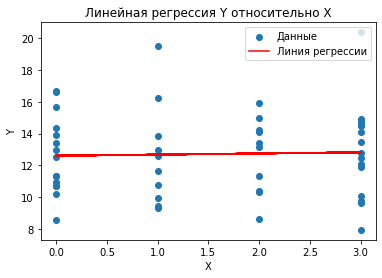

Оценка параметра beta_0: 12.602344827586204
Оценка параметра beta_1: 0.07110344827586204
Уравнение линейной регрессии: Y = 12.6023 + 0.0711 * X


In [17]:
# Вычисление МНК оценок параметров
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Построение линии регрессии
plt.scatter(X, Y, label='Данные')
plt.plot(X, intercept + slope * np.array(X), color='red', label='Линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная регрессия Y относительно X')
plt.legend()
plt.show()

beta_0 = intercept
beta_1 = slope

print(f"Оценка параметра beta_0: {beta_0}")
print(f"Оценка параметра beta_1: {beta_1}")
print(f"Уравнение линейной регрессии: Y = {intercept:.4f} + {slope:.4f} * X")

Видно, что отклонение данных от графика очень большое.

#### Задание 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

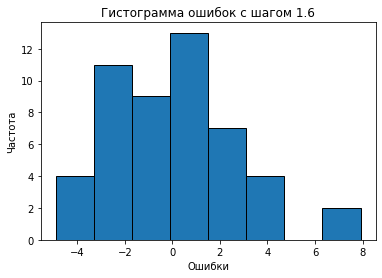

Статистика хи-квадрат: 26.524444444444445
Критическое значение хи-квадрат при alpha=0.2: 11.03009143030311
Гипотеза о нормальности отклоняется
Значение статистики Колмогорова: 0.28188112288192524
p-value: 0.0005238186457026117
Гипотеза о нормальности отклоняется


In [18]:
# Остатки (ошибки) регрессии
errors = np.array(Y) - (intercept + slope * np.array(X))

# Оценка несмещённой дисперсии
unbiased_variance = np.var(errors, ddof=1)  # ddof=1 для несмещённой оценки дисперсии

# Построение гистограммы ошибок с шагом 1.6
plt.hist(errors, bins=np.arange(min(errors), max(errors) + 1.6, 1.6), edgecolor='black')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок с шагом 1.6')
plt.show()

# Проверка гипотезы нормальности ошибок с помощью теста хи-квадрат
alpha = 0.2
hist, bin_edges = np.histogram(errors, bins=np.arange(min(errors), max(errors) + 1.6, 1.6))
expected = len(errors) / len(bin_edges)  # Ожидаемое количество значений в каждом бине
chi_square_stat = np.sum(((hist - expected) ** 2) / expected)
chi_square_critical = stats.chi2.ppf(1 - alpha, len(bin_edges) - 1)  # Критическое значение хи-квадрат

print(f"Статистика хи-квадрат: {chi_square_stat}")
print(f"Критическое значение хи-квадрат при alpha={alpha}: {chi_square_critical}")
if chi_square_stat > chi_square_critical:
    print("Гипотеза о нормальности отклоняется")
else:
    print("Нет оснований отклонить гипотезу о нормальности")

# Оценка расстояния между полученной оценкой и классом нормальных распределений по Колмогорову
k_statistic, p_value = stats.kstest(errors, 'norm')
print(f"Значение статистики Колмогорова: {k_statistic}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print("Гипотеза о нормальности отклоняется")
else:
    print("Нет оснований отклонить гипотезу о нормальности")

Визуально видно, что  распределение не совпадает с нормальным, однако некоторые очертания разглядеть можно. Возможно, нужна большая выборка для более точных результатов.

#### Задание 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0,\beta_1)$ (вычислить его полуоси).

При предположении нормальности ошибок, построим доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$.

Формула для доверительного интервала параметров регрессии:

Для $\beta_0$:
$$
CI_{\beta_0} = \hat{\beta_0} \pm t_{\alpha/2, n-2} \cdot SE(\hat{\beta_0})
$$

Для $\beta_1$:
$$
CI_{\beta_1} = \hat{\beta_1} \pm t_{\alpha/2, n-2} \cdot SE(\hat{\beta_1})
$$

Доверительный эллипс для $(\beta_0, \beta_1)$ с уровнем доверия $1-\alpha$ строится на основе ковариационной матрицы оценок коэффициентов.

Ковариационная матрица:
$$
Cov(\hat{\beta_0}, \hat{\beta_1}) = \frac{\hat{\sigma}^2}{S_{XX}}
\begin{bmatrix}
\frac{\sum X_i^2}{n} & -\bar{X}\sum X_i \\
-\bar{X}\sum X_i & \sum X_i^2
\end{bmatrix}
$$

Полуоси доверительного эллипса можно вычислить как корни из собственных значений ковариационной матрицы, умноженные на соответствующее квантильное значение хи-квадрат распределения для двух измерений:

$$
\text{semi\_axes} = \sqrt{\chi^2_{1-\alpha} \cdot \text{eigenvalues}}
$$

In [19]:
# Оценки коэффициентов регрессии
beta_0 = intercept
beta_1 = slope

# Размер выборки
n = len(X)

# Стандартные ошибки оценок коэффициентов
SE_beta_0 = np.sqrt(unbiased_variance * ((1 / n) + (np.mean(X) ** 2) / np.sum((np.array(X) - np.mean(X)) ** 2)))
SE_beta_1 = np.sqrt(unbiased_variance / np.sum((np.array(X) - np.mean(X)) ** 2))

# Критическое значение t-распределения
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)

# Доверительные интервалы для beta_0 и beta_1
CI_beta_0 = (beta_0 - t_critical * SE_beta_0, beta_0 + t_critical * SE_beta_0)
CI_beta_1 = (beta_1 - t_critical * SE_beta_1, beta_1 + t_critical * SE_beta_1)

print(f"Доверительный интервал для beta_0: {CI_beta_0}")
print(f"Доверительный интервал для beta_1: {CI_beta_1}")

# Доверительный эллипс
covariance_matrix = unbiased_variance / np.sum((np.array(X) - np.mean(X)) ** 2) * np.array([[np.sum(np.array(X) ** 2) / n, -np.mean(X) * np.sum(np.array(X))], [-np.mean(X) * np.sum(np.array(X)), np.sum(np.array(X) ** 2)]])
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
semi_axes = np.sqrt(np.abs(stats.chi2.ppf(1 - alpha, df=2) * eigenvalues))

print(f"Полуоси доверительного эллипса: {semi_axes}")

Доверительный интервал для beta_0: (11.381771063859983, 13.822918591312426)
Доверительный интервал для beta_1: (-0.5634426360720722, 0.7056495326237963)
Полуоси доверительного эллипса: [ 5.46932047 11.93818786]


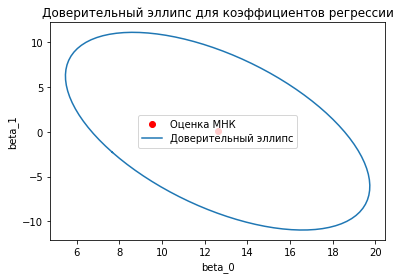

In [20]:
# Создание точек для эллипса
theta = np.linspace(0, 2 * np.pi, 100)
x = semi_axes[0] * np.cos(theta)
y = semi_axes[1] * np.sin(theta)

# Поворот и масштабирование эллипса
rotation_matrix = eigenvectors.T
transformed = np.vstack((x, y)).T @ rotation_matrix

# Центрирование эллипса
transformed[:, 0] += beta_0
transformed[:, 1] += beta_1

# Построение доверительного эллипса
plt.scatter(beta_0, beta_1, color='red', label='Оценка МНК')
plt.plot(transformed[:, 0], transformed[:, 1], label='Доверительный эллипс')
plt.xlabel('beta_0')
plt.ylabel('beta_1')
plt.title('Доверительный эллипс для коэффициентов регрессии')
plt.legend()
plt.show()

#### Задание 4. Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Выясним коэффициент корреляции Пирсона между переменными X и Y.

Коэффициент корреляции Пирсона определяется следующим образом:

$$ r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \sum_{i=1}^{n} (Y_i - \bar{Y})^2}} $$

Проведём проверку значимости коэффициента корреляции для оценки статистической значимости.

In [21]:
# Вычисление коэффициента корреляции Пирсона и p-value
correlation_coefficient, p_value = stats.pearsonr(X, Y)

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"p-value: {p_value}")

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    print("Отклоняем нулевую гипотезу в пользу альтернативной: существует зависимость между переменными X и Y.")
else:
    print("Нет достаточных доказательств для отклонения нулевой гипотезы: переменные X и Y, вероятно, независимы.")

Коэффициент корреляции Пирсона: 0.03216901843017694
p-value: 0.8244903713508994
Нет достаточных доказательств для отклонения нулевой гипотезы: переменные X и Y, вероятно, независимы.


#### Задание 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Мы рассматриваем модель вида:

$$ Y = \beta_0 + \beta_1 \cdot X + \beta_2 \cdot X^2 + \varepsilon $$

Для получения МНК оценок параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели, используем библиотеку `numpy` для выполнения линейной регрессии с дополнительным членом $X^2$.

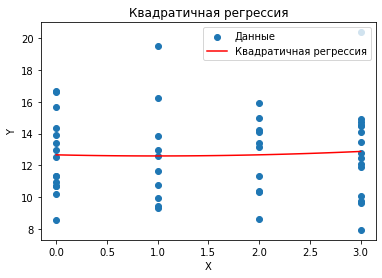

Оценка параметра beta_0: 12.658678160944975
Оценка параметра beta_1: -0.14014655172662516
Оценка параметра beta_2: 0.0704166666646383
Уравнение линейной регрессии: Y = 12.6587 + -0.1401 * X + 0.0704 * X^2


In [22]:
# Функция для квадратичной регрессии
def quadratic_regression(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

# Применение МНК для квадратичной регрессии
params, covariance = curve_fit(quadratic_regression, X, Y)

# Полученные коэффициенты
beta_0 = params[0]
beta_1 = params[1]
beta_2 = params[2]

# Построение графика регрессионной зависимости
plt.scatter(X, Y, label='Данные')
x_range = np.linspace(min(X), max(X), 100)
plt.plot(x_range, quadratic_regression(x_range, *params), color='red', label='Квадратичная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Квадратичная регрессия')
plt.legend()
plt.show()

print(f"Оценка параметра beta_0: {beta_0}")
print(f"Оценка параметра beta_1: {beta_1}")
print(f"Оценка параметра beta_2: {beta_2}")
print(f"Уравнение линейной регрессии: Y = {beta_0:.4f} + {beta_1:.4f} * X + {beta_2:.4f} * X^2")

#### Задание 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

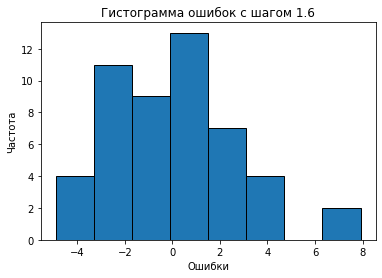

Статистика хи-квадрат: 26.524444444444445
Критическое значение хи-квадрат при alpha=0.05: 15.50731305586545
Гипотеза о нормальности отклоняется
Значение статистики Колмогорова: 0.28188112288192524
p-value: 0.0005238186457026117
Гипотеза о нормальности отклоняется


In [23]:
# Несмещённая оценка дисперсии
unbiased_variance = np.var(errors, ddof=1)  # errors - остатки после квадратичной регрессии

# Построение гистограммы ошибок с шагом h
h = 1.6
plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h), edgecolor='black')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок с шагом 1.6')
plt.show()

# Проверка гипотезы нормальности ошибок с помощью теста хи-квадрат
alpha = 0.05
hist, bin_edges = np.histogram(errors, bins=np.arange(min(errors), max(errors) + h, h))
expected = len(errors) / len(bin_edges)  # Ожидаемое количество значений в каждом бине
chi_square_stat = np.sum(((hist - expected) ** 2) / expected)
chi_square_critical = stats.chi2.ppf(1 - alpha, len(bin_edges) - 1)  # Критическое значение хи-квадрат

print(f"Статистика хи-квадрат: {chi_square_stat}")
print(f"Критическое значение хи-квадрат при alpha={alpha}: {chi_square_critical}")
if chi_square_stat > chi_square_critical:
    print("Гипотеза о нормальности отклоняется")
else:
    print("Нет оснований отклонить гипотезу о нормальности")

# Оценка расстояния до класса нормальных распределений по Колмогорову
k_statistic, p_value = stats.kstest(errors, 'norm')
print(f"Значение статистики Колмогорова: {k_statistic}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print("Гипотеза о нормальности отклоняется")
else:
    print("Нет оснований отклонить гипотезу о нормальности")

#### Задание 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

In [24]:
# Уровень доверия
alpha = 0.2

# Критическое значение для уровня доверия (alpha/2 для двухстороннего доверительного интервала)
z_alpha = stats.norm.ppf(1 - alpha / 2)

# Ковариационная матрица оценок параметров регрессии
cov_matrix = covariance  # covariance - матрица ковариаций, полученная из МНК

# Доверительные интервалы для beta_0, beta_1, beta_2
confidence_interval_beta_0 = (beta_0 - z_alpha * np.sqrt(cov_matrix[0, 0]), beta_0 + z_alpha * np.sqrt(cov_matrix[0, 0]))
confidence_interval_beta_1 = (beta_1 - z_alpha * np.sqrt(cov_matrix[1, 1]), beta_1 + z_alpha * np.sqrt(cov_matrix[1, 1]))
confidence_interval_beta_2 = (beta_2 - z_alpha * np.sqrt(cov_matrix[2, 2]), beta_2 + z_alpha * np.sqrt(cov_matrix[2, 2]))

print(f"Доверительный интервал для beta_0: {confidence_interval_beta_0}")
print(f"Доверительный интервал для beta_1: {confidence_interval_beta_1}")
print(f"Доверительный интервал для beta_2: {confidence_interval_beta_2}")

# Уравнение доверительного эллипсоида
semi_axes = np.sqrt(np.diag(cov_matrix))

print(f"Полуоси доверительного эллипса: {semi_axes}")

Доверительный интервал для beta_0: (11.766867994234866, 13.550488327655083)
Доверительный интервал для beta_1: (-1.7172223512952094, 1.436929247841959)
Доверительный интервал для beta_2: (-0.43694481701806653, 0.5777781503473431)
Полуоси доверительного эллипса: [0.69588317 1.23059879 0.39589627]


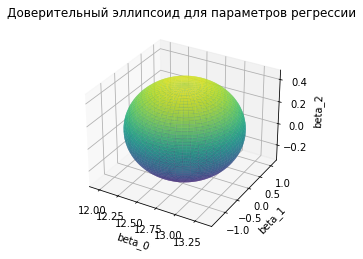

In [25]:
# Создание фигуры и 3D-осей
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Параметры для построения эллипсоида
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = semi_axes[0] * np.outer(np.cos(u), np.sin(v)) + beta_0
y = semi_axes[1] * np.outer(np.sin(u), np.sin(v)) + beta_1
z = semi_axes[2] * np.outer(np.ones(np.size(u)), np.cos(v)) + beta_2

# Построение эллипсоида
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)

# Настройка меток и заголовка
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('beta_2')
ax.set_title('Доверительный эллипсоид для параметров регрессии')

# Отображение
plt.show()

#### Задание 8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

### Гипотезы

$H_0$: Отсутствие линейной зависимости: $\beta_1 = 0$

$H_1$: Наличие линейной зависимости: $\beta_1 \neq 0$

### Проверка значимости

Для проверки значимости используем коэффициент наклона $\beta_1$ и его p-value при уровне значимости $\alpha$.

In [26]:
# Выполним линейную регрессию для получения коэффициентов, в том числе коэффициента наклона (beta_1)
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

alpha = 0.2

print(f"p-value для коэффициента наклона (beta_1): {p_value}")

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: существует линейная зависимость между X и Y.")
else:
    print("Нет достаточных доказательств для отклонения нулевой гипотезы: вероятно, отсутствует линейная зависимость между X и Y.")

p-value для коэффициента наклона (beta_1): 0.8244903713509002
Нет достаточных доказательств для отклонения нулевой гипотезы: вероятно, отсутствует линейная зависимость между X и Y.


## Выводы



Была исследована линейная регрессионная модель. Были построены линейная и квадратичная зависимости между X и Y.  
Была проведена проверка нормальности ошибок отклонения данных от линейной и квадратичной регрессий.  
Была проведена проверка значимости регрессии, которая показала отсутствие линейной зависимости между X и Y.  
Были построены доверительные интервалы и доверительный эллипсоид для $\beta_0$ и $\beta_1$.